In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
from functions import *
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point,MultiPolygon
import requests

__>>Loading the raw data and displaying the first 5 rows__

In [2]:
data = pd.read_csv("../data/311-raw-data.csv",sep=',')

In [3]:
data.head()

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Lat,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point
0,8018038893,"Jun 13, 2018",June 14 2018,Closed,NaN,Pothole,Road,Roadway Operations,KENSINGTON,Kensington Community League,...,53.598197,-113.533269,"(53.598196819091704, -113.53326939559359)",Mobile App,2018,1,NaN,NaN,NaN,POINT (-113.53326939559359 53.598196819091704)
1,295809662,"Oct 23, 2018",October 23 2018,Closed,Vehicle Towed,Parking Enforcement,Safety & Other,Community Standards,GRIESBACH,Griesbach Community League,...,53.600322,-113.505359,"(53.60032220041548, -113.5053586619727)",Phone Call,2018,1,295809662-001,NaN,NaN,POINT (-113.5053586619727 53.60032220041548)
2,8020131037,"Jul 22, 2019",July 24 2019,Closed,NaN,Road/Sidewalk Maintenance,Road Dip,Roadway Operations,PARKALLEN,Parkallen Community Ass'n (1960),...,53.502641,-113.515419,"(53.50264070670679, -113.51541916965262)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.51541916965262 53.50264070670679)
3,280246644,"Apr 23, 2018",April 23 2018,Closed,Vehicle Gone Upon Arrival,Parking Enforcement,Safety & Other,Community Standards,ELLERSLIE,ELLERSLIE COMMUNITY LEAGUE ASSOCIATION,...,53.426609,-113.454915,"(53.4266089434476, -113.45491468627651)",Mobile App,2018,1,280246644-001,NaN,NaN,POINT (-113.45491468627651 53.4266089434476)
4,8019550662,"Apr 11, 2019",April 12 2019,Closed,Duplicate Request Exists,Pothole,Alley,Roadway Operations,BRITANNIA YOUNGSTOWN,Britannia Youngstown Community League,...,53.550766,-113.594012,"(53.550765935667314, -113.59401244384615)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.59401244384615 53.550765935667314)


__>>Shape__

In [4]:
data.shape

(934155, 22)

__>>Column names__

In [5]:
data.columns

Index(['Reference Number', 'Date Created', 'Date Closed', 'Request Status',
       'Status Detail', 'Service Category', 'Service Code', 'Business Unit',
       'Neighbourhood', 'Community League', 'Ward', 'Address', 'Lat', 'Long',
       'Location', 'Ticket Source', 'Calendar Year', 'Count', 'Posse_Number',
       'Transit_Ref_Number', 'IVARA Ticket Num', 'Geometry Point'],
      dtype='object')

__>>Value Range description__

In [6]:
data.describe()

,Lat,Long,Calendar Year,Count,IVARA Ticket Num
count,934153.000000,934155.000000,934155.000000,934155.0,4582.000000
mean,53.527834,-113.449474,2019.338007,1.0,457722.443474
std,0.060189,39.140574,2.801603,0.0,12756.792716
min,53.337684,-113.713619,2013.000000,1.0,425004.000000
25%,53.481931,-113.551323,2017.000000,1.0,448747.250000
50%,53.532478,-113.500589,2019.000000,1.0,460087.500000
75%,53.572061,-113.452577,2022.000000,1.0,467844.500000
max,53.716072,30741.000000,2024.000000,1.0,475546.000000


__>>What are the data types?__

In [7]:
data.dtypes

Reference Number       object
Date Created           object
Date Closed            object
Request Status         object
Status Detail          object
Service Category       object
Service Code           object
Business Unit          object
Neighbourhood          object
Community League       object
Ward                   object
Address                object
Lat                   float64
Long                  float64
Location               object
Ticket Source          object
Calendar Year           int64
Count                   int64
Posse_Number           object
Transit_Ref_Number     object
IVARA Ticket Num      float64
Geometry Point         object
dtype: object

__>>How many nulls in each column of the dataframe?__

In [8]:
data.isna().sum()

Reference Number           0
Date Created               0
Date Closed             6859
Request Status             0
Status Detail         537731
Service Category           0
Service Code               0
Business Unit              0
Neighbourhood          12230
Community League       62571
Ward                    1529
Address                10106
Lat                        2
Long                       0
Location                   2
Ticket Source              0
Calendar Year              0
Count                      0
Posse_Number          682214
Transit_Ref_Number    930298
IVARA Ticket Num      929573
Geometry Point        312763
dtype: int64

__>>Nulls in each column by percentage__

In [9]:
((data.isna().sum())/data.shape[0])*100

Reference Number       0.000000
Date Created           0.000000
Date Closed            0.734246
Request Status         0.000000
Status Detail         57.563359
Service Category       0.000000
Service Code           0.000000
Business Unit          0.000000
Neighbourhood          1.309205
Community League       6.698139
Ward                   0.163677
Address                1.081833
Lat                    0.000214
Long                   0.000000
Location               0.000214
Ticket Source          0.000000
Calendar Year          0.000000
Count                  0.000000
Posse_Number          73.030065
Transit_Ref_Number    99.587113
IVARA Ticket Num      99.509503
Geometry Point        33.480846
dtype: float64

## Data Types Confirmation and Conversion

>In this section, I will clean and convert the data types of my dataset. To achieve this, I will use predefined functions from my functions.py file. This file contains various utility functions to streamline and modularize the data cleaning and conversion process.

The functions used include:

- `change_to_int`: Converts specified columns to integer type.
- `change_to_float`: Converts specified columns to float type.
- `change_to_object`: Converts specified columns to object type (string).
- `change_to_datetime`: Converts specified columns to datetime type.
- `change_to_timedelta`: Converts specified columns to timedelta type.
- `change_to_numeric_int`: Handles columns that need extra processing for conversion to integer.

I will use the `clean_and_convert_data` function, which applies these conversions to our dataset.

#### Column Type Conversions
- **Integer Conversion:**
    
    *Columns: Count, Calendar Year*

- **Float Conversion:**

    *Columns: Lat, Long*

- **Object Conversion:**

    *Columns: Request Status, Service Category, Service Code, Business Unit, Neighbourhood, Community League, Ward, Address, Location, Ticket Source, Geometry Point*

- **Datetime Conversion:**

    *Columns: Date Created, Date Closed*

- **Numeric Conversion with Error Handling:**

    *Column: Reference Number*

By applying these functions, I ensure that the columns in my dataset are converted to the appropriate types, allowing for accurate and efficient data analysis. 

In [10]:
data = clean_and_convert(data)

In [11]:
data.dtypes

Reference Number               int64
Date Created          datetime64[ns]
Date Closed           datetime64[ns]
Request Status                object
Status Detail                 object
Service Category              object
Service Code                  object
Business Unit                 object
Neighbourhood                 object
Community League              object
Ward                          object
Address                       object
Lat                          float64
Long                         float64
Location                      object
Ticket Source                 object
Calendar Year                  int32
Count                          int32
Posse_Number                  object
Transit_Ref_Number            object
IVARA Ticket Num             float64
Geometry Point                object
dtype: object

In [12]:
#Making sure all the null values are confirmed nulls

# Defining the values to replace
null_values = ['', 'NULL', 'NA', 'nan']

# Replace multiple values with NaN
data.replace(null_values, np.nan, inplace=True)

In [13]:
data.head()

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Lat,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point
0,8018038893,2018-06-13,2018-06-14,Closed,NaN,Pothole,Road,Roadway Operations,KENSINGTON,Kensington Community League,...,53.598197,-113.533269,"(53.598196819091704, -113.53326939559359)",Mobile App,2018,1,NaN,NaN,NaN,POINT (-113.53326939559359 53.598196819091704)
1,295809662,2018-10-23,2018-10-23,Closed,Vehicle Towed,Parking Enforcement,Safety & Other,Community Standards,GRIESBACH,Griesbach Community League,...,53.600322,-113.505359,"(53.60032220041548, -113.5053586619727)",Phone Call,2018,1,295809662-001,NaN,NaN,POINT (-113.5053586619727 53.60032220041548)
2,8020131037,2019-07-22,2019-07-24,Closed,NaN,Road/Sidewalk Maintenance,Road Dip,Roadway Operations,PARKALLEN,Parkallen Community Ass'n (1960),...,53.502641,-113.515419,"(53.50264070670679, -113.51541916965262)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.51541916965262 53.50264070670679)
3,280246644,2018-04-23,2018-04-23,Closed,Vehicle Gone Upon Arrival,Parking Enforcement,Safety & Other,Community Standards,ELLERSLIE,ELLERSLIE COMMUNITY LEAGUE ASSOCIATION,...,53.426609,-113.454915,"(53.4266089434476, -113.45491468627651)",Mobile App,2018,1,280246644-001,NaN,NaN,POINT (-113.45491468627651 53.4266089434476)
4,8019550662,2019-04-11,2019-04-12,Closed,Duplicate Request Exists,Pothole,Alley,Roadway Operations,BRITANNIA YOUNGSTOWN,Britannia Youngstown Community League,...,53.550766,-113.594012,"(53.550765935667314, -113.59401244384615)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.59401244384615 53.550765935667314)


## Data Cleaning 
 We will be working feature wise 

### 1. Date Closed - Empty rows (19844) 
   
      Strategy :
      - Requests status is closed : Finding an average number of days it takes to close the request from the dataset and replacing the value where **requests status is closed** based on each service category type.
      - Requests status is Open : The **rows with request status open** would be replaced with a placeholder value of random future date to distinguish that request is still open. Based on the Month and Year, it can be validated the majority of requests are new from year 2024 and are still open.  


**>>Average number of days it takes to close a request based on service category type**

In [14]:
data['Duration'] = (data[data['Request Status']=='Closed']['Date Closed']- data[data['Request Status']=='Closed']['Date Created'])

mean_request_duration = data[data['Request Status']=='Closed'].groupby(by='Service Category')['Duration'].mean().dt.floor('d')

mean_request_duration


Service Category
Animal Pick Up Request                    0 days
Bees/Wasps                                3 days
Broken Branch                             7 days
Bylaw Complaints                         68 days
Collection & Disposal Services-Garbage    9 days
Commendations/Complaints                 20 days
Dead Animal Removal                       6 days
Drainage Maintenance                     52 days
Encampments                               8 days
General Information                       0 days
Graffiti                                 27 days
Horticulture                             12 days
Litter                                   13 days
Litter & Waste                            6 days
Maintenance - Auxillary                  44 days
Maintenance - Bike Infrastructure        25 days
Maintenance - ETS                         9 days
Maintenance - Parks                      21 days
Maintenance - Playgrounds                36 days
Maintenance - Road Bridges               47 days
Mai

**>>Null request status rows indices**

In [15]:
closed_date_none_indices = data[(data['Request Status'] == 'Closed') & (data['Date Closed'].isna())].index
data[(data['Request Status'] == 'Closed') & (data['Date Closed'].isna())].head()

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
34013,8025593068,2024-01-08,NaT,Closed,NaN,Maintenance - Snow & Ice,SAND:Road Icy Conditions,Roadway Maintenance,RIVER VALLEY HERMITAGE,Homesteader (Edmonton) Community League,...,-113.384395,"(53.58596757641688, -113.38439461850294)",Phone Call,2024,1,NaN,NaN,NaN,NaN,NaT
59196,8023083542,2021-10-03,NaT,Closed,NaN,Litter,LITTER:Road,Roadway Maintenance,MACTAGGART,Terwillegar Community League,...,-113.564117,"(53.43802945528588, -113.56411650483541)",Phone Call,2021,1,NaN,NaN,NaN,NaN,NaT
137574,8024015111,2022-07-11,NaT,Closed,NaN,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,BELMONT,South Clareview Community League,...,-113.385781,"(53.58932647525902, -113.38578059328255)",Phone Call,2022,1,NaN,NaN,NaN,NaN,NaT
195461,8021052510,2020-02-14,NaT,Closed,NaN,Litter,LITTER:Road,Roadway Maintenance,ANTHONY HENDAY HORSE HILL,Horse Hill Community League (1995) Asssociation,...,-113.391886,"(53.635338789492614, -113.39188597676277)",Phone Call,2020,1,NaN,NaN,NaN,POINT (-113.39188597676277 53.635338789492614),NaT
201152,8021085623,2020-02-24,NaT,Closed,NaN,Traffic Signals & Street Lights,Street Light Outage Manually Reported,Traffic,KLARVATTEN,Lago Lindo Community League,...,-113.471024,"(53.632659430013334, -113.47102447179294)",Phone Call,2020,1,NaN,NaN,NaN,POINT (-113.47102447179294 53.632659430013334),NaT


**>>Imputing with average duration to close based on service category**

In [16]:
data.loc[((data['Request Status'] == 'Closed') & (data['Date Closed'].isna())), 'Date Closed'] = data['Date Created'] + data['Service Category'].map(mean_request_duration)

In [17]:
data.loc[closed_date_none_indices].head()

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
34013,8025593068,2024-01-08,2024-01-12,Closed,NaN,Maintenance - Snow & Ice,SAND:Road Icy Conditions,Roadway Maintenance,RIVER VALLEY HERMITAGE,Homesteader (Edmonton) Community League,...,-113.384395,"(53.58596757641688, -113.38439461850294)",Phone Call,2024,1,NaN,NaN,NaN,NaN,NaT
59196,8023083542,2021-10-03,2021-10-16,Closed,NaN,Litter,LITTER:Road,Roadway Maintenance,MACTAGGART,Terwillegar Community League,...,-113.564117,"(53.43802945528588, -113.56411650483541)",Phone Call,2021,1,NaN,NaN,NaN,NaN,NaT
137574,8024015111,2022-07-11,2022-07-31,Closed,NaN,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,BELMONT,South Clareview Community League,...,-113.385781,"(53.58932647525902, -113.38578059328255)",Phone Call,2022,1,NaN,NaN,NaN,NaN,NaT
195461,8021052510,2020-02-14,2020-02-27,Closed,NaN,Litter,LITTER:Road,Roadway Maintenance,ANTHONY HENDAY HORSE HILL,Horse Hill Community League (1995) Asssociation,...,-113.391886,"(53.635338789492614, -113.39188597676277)",Phone Call,2020,1,NaN,NaN,NaN,POINT (-113.39188597676277 53.635338789492614),NaT
201152,8021085623,2020-02-24,2020-03-19,Closed,NaN,Traffic Signals & Street Lights,Street Light Outage Manually Reported,Traffic,KLARVATTEN,Lago Lindo Community League,...,-113.471024,"(53.632659430013334, -113.47102447179294)",Phone Call,2020,1,NaN,NaN,NaN,POINT (-113.47102447179294 53.632659430013334),NaT


**>>Checking for any null values**

In [18]:
data[(data['Request Status'] == 'Closed') & (data['Date Closed'].isna())]

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration


**>>Imputing rows where Requests status is Open**

In [19]:
data[data['Request Status']=='Open']['Status Detail'].value_counts()

Status Detail
Work Planned-Route/Schedule Dependent      669
Warning Issued                             484
Deferred-Future Work Planned.              411
Assigned - Assessment in Progress          201
Assessment in Progress                     148
Inspection Completed                        78
Work Planned-Seasonal/Weather Dependent     42
Investigation Ongoing                       12
Citizen Contacted                            5
Enforcement Action Taken                     3
Partially Completed-Future work planned      3
Sent for Clean-Up                            2
Name: count, dtype: int64

From above Status Detail description, It can be interpreted that these requests require a 3rd party intervention in order for closure. For Date Closed column for these enteries, we will be using a Future placeholder date so they can be distinguished from our actual Closed requests.

Future Place holder - adding 1 year to Date created.

In [20]:
data.loc[((data['Request Status'] == 'Open') & (data['Date Closed'].isna())), 'Date Closed'] = data['Date Created'] + pd.Timedelta(days=365)

In [21]:
data[data['Date Closed'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration


### 2. Status Detail - Empty Rows (537731 i.e 57.56% of rows) 

    Strategy : 57.56% of rows are empty !

    Further analysis of **Status Detail** column reveales that duplicates requests exist in the system even though the **Reference Number** is distinct. Let us remove the rows with ***status detail*** contatining ***duplicate*** keyword 

In [22]:
data[data['Status Detail'].notna() & data['Status Detail'].str.contains('Duplicate',case=False)].sample(3)

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
71587,452657783,2022-10-31,2022-10-31,Closed,Duplicate Request Exists,Encampments,Encampments Enforcement,Park Rangers,ROPER INDUSTRIAL,NaN,...,-113.442663,"(53.48561846474684, -113.44266301556303)",Phone Call,2022,1,452657783-001,NaN,NaN,NaN,0 days
83713,480126758,2023-08-01,2023-08-02,Closed,Duplicate Request Exists,Encampments,Encampments Enforcement,Park Rangers,RIVER VALLEY KINNAIRD,The Boyle Street Community League,...,-113.471109,"(53.552118751481785, -113.47110897082351)",Mobile App Generic,2023,1,480126758-001,NaN,NaN,NaN,1 days
836702,445560760,2022-08-28,2022-08-29,Closed,Duplicate Request Exists,Encampments,Encampments Enforcement,Park Rangers,LANSDOWNE,Lansdowne Community League,...,-113.555638,"(53.48902134389245, -113.55563835165596)",Phone Call,2022,1,445560760-001,NaN,NaN,NaN,1 days


**>>Checking for null values**

In [23]:
data = data.drop(data[data['Status Detail'].notna() & data['Status Detail'].str.contains('Duplicate',case=False)].index)

data[data['Status Detail'].notna() & data['Status Detail'].str.contains('Duplicate')]

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration


**>>Status Detail is 50% null so it is safe to drop it as imputations would be 50% higher assumed.**

In [24]:
data = data.drop(columns='Status Detail',axis=1)

### 3. Neighbourhood - Empty Rows (12230 i.e 1.3% of rows), Wards - Empty Rows (1527 i.e 0.16% of rows), Geometry Points, Lat and Location

    Startegy for Neighbourhoods: **City of Edmonton - Neighbourhoods** (https://data.edmonton.ca/City-Administration/City-of-Edmonton-Neighbourhoods/65fr-66s6) contains the polygon coordinates of different neighbourhoods in edmonton. Using this we can determine if **Lat and Long** attributes of the row falls within the polygon and we can accurately fill our null values. 

    Startegy for Wards : Using the same data for neighbourhoods, we can impute wards as well as this data provides us with neighbourhoods + wards

    Strategy for Geometry Points : By creating a Geopoint using the Shapely Python package and features ( Latitude and Longitude )

In [25]:
#data = pd.read_csv('../data/data_testing.csv',sep=',')

**>>Dropping the Lat and Location null rows**

In [26]:
data = data.dropna(subset=['Lat', 'Location'])

**>>Geometry Point feature imputation using lat and long values.**

In [27]:
data['Geometry Point'] = data.apply(
    lambda row: Point(row['Long'], row['Lat']) if pd.isna(row['Geometry Point']) else row['Geometry Point'],
    axis=1
)

**>>Importing Neighbourhoods dataset from 311 OpenAPI**

In [28]:
neighbourhoods = pd.read_csv(r"..\data\neighbourhoods-data.csv")

### *Sample on how both dataframes would work together*

>- Sample : Imputing  the neighbourhood for row with **Reference Number = 8018883286** and its neighbourhood should be **MCQUEEN** as per its coordinates.
>- Using the spatial join and plotting, we will inquire if the row's coordinates lies between the neighbourhood's polygon

In [29]:
data[data['Neighbourhood'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
241,8017711515,2018-04-16,2018-04-16,Closed,Litter & Waste,Sidewalk,Roadway Operations,NaN,Blackmud Creek Community League,09,...,-113.516303,"(53.41696155174807, -113.5163034818601)",Phone Call,2018,1,NaN,NaN,NaN,POINT (-113.5163034818601 53.41696155174807),0 days
322,8017920535,2018-05-24,2018-05-25,Closed,Road/Sidewalk Maintenance,Road Dip,Roadway Operations,NaN,NaN,NaN,...,-113.319723,"(53.57221017930485, -113.31972269642891)",Phone Call,2018,1,NaN,NaN,NaN,POINT (-113.31972269642891 53.57221017930485),1 days
366,8021116222,2020-03-03,2020-04-17,Closed,Maintenance - Snow & Ice,PLOW:Arterial Road Plow Request,Roadway Maintenance,NaN,Blackmud Creek Community League,09,...,-113.522127,"(53.403299012073404, -113.52212740192289)",Mobile App,2020,1,NaN,NaN,NaN,POINT (-113.52212740192289 53.403299012073404),45 days
1065,8018883286,2018-11-26,2018-11-27,Closed,Snow & Ice Maintenance,Sanding,Roadway Operations,NaN,McQueen Community League,06,...,-113.567221,"(53.55448204769594, -113.56722139438205)",Phone Call,2018,1,NaN,NaN,NaN,POINT (-113.56722139438205 53.55448204769594),1 days
1653,8022616771,2021-06-15,2021-06-15,Closed,Pests - Non Insect,PEST:Gophers/Squirrels City Property,Pest Management,NaN,NaN,11,...,-113.417808,"(53.51170348233234, -113.4178082068151)",Phone Call,2021,1,NaN,NaN,NaN,POINT (-113.4178082068151 53.51170348233234),0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934107,520692381,2024-07-22,2024-07-23,Closed,Encampments,Encampments Enforcement,Park Rangers,NaN,Caernarvon Community League,Anirniq,...,-113.536385,"(53.613740031724795, -113.53638456838418)",Mobile App Generic,2024,1,520692381-001,NaN,NaN,POINT (-113.5363845683842 53.6137400317248),1 days
934121,8026160583,2024-07-23,2025-07-23,Open,Traffic Signals & Street Lights,Street Light Outage Auto Reported Z2,Traffic,NaN,The Woodvale Community League,Karhiio,...,-113.435391,"(53.4536840291469, -113.43539114464747)",ESRI MAP,2024,1,NaN,NaN,NaN,POINT (-113.4353911446475 53.4536840291469),NaT
934132,520692238,2024-07-22,2025-07-22,Open,Encampments,Encampments Enforcement,Park Rangers,NaN,Westmount Community League,O-day'min,...,-113.542865,"(53.557310035802566, -113.54286458591777)",Mobile App Generic,2024,1,520692238-001,NaN,NaN,POINT (-113.5428645859178 53.55731003580257),NaT
934136,520756681,2024-07-23,2025-07-23,Open,Encampments,Encampments Enforcement,Park Rangers,NaN,Northmount Community League,tastawiyiniwak,...,-113.491736,"(53.60257102705895, -113.49173558216081)",Phone Call,2024,1,520756681-001,NaN,NaN,POINT (-113.4917355821608 53.60257102705895),NaT


In [30]:
#sample from data dataframe

data_test = data[data['Reference Number']==8009164632].copy()
data_test

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
530210,8009164632,2014-01-23,2014-01-24,Closed,Drainage Maintenance,Manhole Cover Concern,Drainage Operations,NaN,Queen Mary Park Community League,06,...,-113.511576,"(53.556352514925194, -113.51157613474565)",Phone Call,2014,1,NaN,NaN,NaN,POINT (-113.51157613474565 53.556352514925194),1 days


In [31]:
#sample from neighbourhoods dataframe

neighbourhoods_test = neighbourhoods[neighbourhoods['Neighbourhood Name'].str.contains('QUEEN MARY PARK')].copy()
neighbourhoods_test

,Neighbourhood Name,Neighbourhood Number,Descriptive Name,Description,Effective Start Date,Effective End Date,Civic Ward,Planning District,Geometry Multipolygon
286,QUEEN MARY PARK,1180,Queen Mary Park,Lying just north of the City's business distri...,1981-10-01,NaN,O-day'min,Central,MULTIPOLYGON (((-113.50843165202596 53.5588917...


In [32]:
# Ensure geometries are valid
data_test['Geometry Point'] = data_test['Geometry Point'].apply(convert_to_geometry)
neighbourhoods_test['Geometry Multipolygon'] = neighbourhoods_test['Geometry Multipolygon'].apply(convert_to_geometry)

# Convert to GeoDataFrames
data_gdf_test = gpd.GeoDataFrame(data_test, geometry='Geometry Point')
neighbourhoods_gdf_test = gpd.GeoDataFrame(neighbourhoods_test, geometry='Geometry Multipolygon')

# Apply a smaller buffer to the polygons (e.g., 0.0001 degree)
#neighbourhoods_gdf_test['Geometry Multipolygon'] = neighbourhoods_gdf_test.buffer(0.0001)

In [33]:
# Set CRS for both GeoDataFrames
data_gdf_test.crs = 'EPSG:32612'
neighbourhoods_gdf_test.crs = 'EPSG:32612'

**Why Use EPSG:32612?*

*Geographic Location: EPSG:32612 is typically used for areas between 120°W and 114°W longitude, and 0° to 84°N latitude, which covers parts of the western United States, Canada, and Mexico.*

In [34]:
# Ensure both GeoDataFrames are in the same CRS ( Corrdinate Reference System)
data_gdf_test = data_gdf_test.to_crs(neighbourhoods_gdf_test.crs)

**>Plotting the Geomtery point vs the neighbourhood polygon**

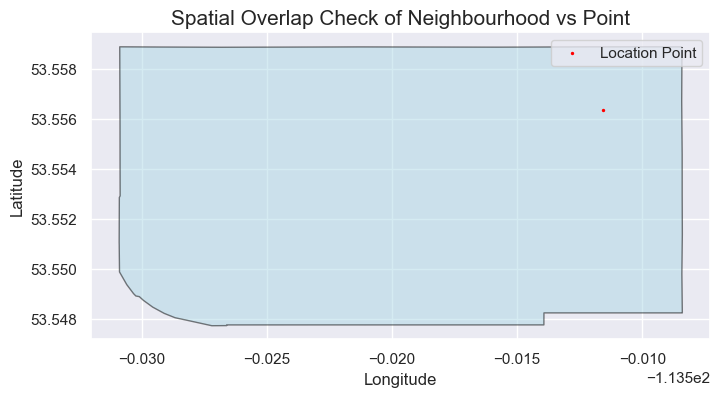

In [35]:
import matplotlib.pyplot as plt

# Plot the neighbourhood and the point
fig, ax = plt.subplots(figsize=(8,5))

# Plot neighbourhood polygons
neighbourhoods_gdf_test.plot(ax=ax, color='lightblue', edgecolor='black',alpha=0.5)

# Plot the point
data_gdf_test.plot(ax=ax, color='red', marker='o', markersize=2)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Overlap Check of Neighbourhood vs Point',fontsize=15)
plt.legend(['Location Point'], loc='upper right')

# Adjust layout
plt.tight_layout(pad=3.0) 

plt.show()

**>Imputing and checking if we got the correct neighbourhood**

In [36]:
# Perform the spatial join
joined_gdf_test = gpd.sjoin(data_gdf_test, neighbourhoods_gdf_test, how='left', predicate='within')

In [37]:
# Ensure index alignment
data_test = data_test.reset_index(drop=True)
joined_gdf_test = joined_gdf_test.reset_index(drop=True)

In [38]:
joined_gdf_test

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Duration,index_right,Neighbourhood Name,Neighbourhood Number,Descriptive Name,Description,Effective Start Date,Effective End Date,Civic Ward,Planning District
0,8009164632,2014-01-23,2014-01-24,Closed,Drainage Maintenance,Manhole Cover Concern,Drainage Operations,NaN,Queen Mary Park Community League,06,...,1 days,286,QUEEN MARY PARK,1180,Queen Mary Park,Lying just north of the City's business distri...,1981-10-01,NaN,O-day'min,Central


In [39]:
data_test['Neighbourhood'] = data_test['Neighbourhood'].fillna(joined_gdf_test['Neighbourhood Name'])
data_test

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
0,8009164632,2014-01-23,2014-01-24,Closed,Drainage Maintenance,Manhole Cover Concern,Drainage Operations,QUEEN MARY PARK,Queen Mary Park Community League,06,...,-113.511576,"(53.556352514925194, -113.51157613474565)",Phone Call,2014,1,NaN,NaN,NaN,POINT (-113.5115761347457 53.55635251492519),1 days


**>Applying the same to entire dataset with the following functions**

In [40]:
data,joined_df = spatial_join(data,neighbourhoods,'Geometry Point','Geometry Multipolygon')

In [41]:
print(data['Geometry Point'].apply(type).unique())
print(neighbourhoods['Geometry Multipolygon'].apply(type).unique())

[<class 'shapely.geometry.point.Point'>]
[<class 'shapely.geometry.multipolygon.MultiPolygon'>]


In [42]:
print(data.shape)
print(joined_df.shape)

(841772, 22)
(841538, 31)


In [43]:
data = spatial_join_imputation(data, joined_df, 'Neighbourhood', 'Neighbourhood Name', 'Ward', 'Civic Ward', 'Reference Number')

In [44]:
print(data.shape)

(841772, 22)


**>>Checking for null values**

In [45]:
data[data['Neighbourhood'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
2564,8012297462,2015-07-03,2015-08-04,Closed,Road/Sidewalk Maintenance,Road Dip,Roadway Operations,NaN,NaN,NaN,...,-113.343409,"(53.48453929710685, -113.34340855769538)",Phone Call,2015,1,NaN,NaN,NaN,POINT (-113.3434085576954 53.48453929710685),32 days
30193,8023223721,2021-11-16,2021-11-18,Closed,Maintenance - Snow & Ice,SAND:Road Icy Conditions,Roadway Maintenance,NaN,NaN,NaN,...,-113.369078,"(53.52326399561391, -113.36907849552549)",Phone Call,2021,1,NaN,NaN,NaN,POINT (-113.3690784955255 53.52326399561391),2 days
30540,8023486653,2022-02-05,2022-02-07,Closed,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,NaN,NaN,NaN,...,-113.369110,"(53.517108678988535, -113.36910963249558)",Phone Call,2022,1,NaN,NaN,NaN,POINT (-113.3691096324956 53.51710867898854),2 days
32477,8022886211,2021-08-13,2021-11-22,Closed,Litter,LITTER:Road,Roadway Maintenance,NaN,NaN,NaN,...,-113.337840,"(53.56924759069745, -113.33784010010048)",Phone Call,2021,1,NaN,NaN,NaN,POINT (-113.3378401001005 53.56924759069745),101 days
39442,8020562950,2019-10-16,2019-11-06,Closed,Pothole,Gravel Alley,Roadway Operations,NaN,NaN,NaN,...,-113.442847,"(53.36689352321539, -113.44284652242702)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.442846522427 53.36689352321539),21 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757960,8024264535,2022-09-20,2022-09-21,Closed,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,NaN,NaN,NaN,...,-113.369245,"(53.54050917052215, -113.36924451142956)",Phone Call,2022,1,NaN,NaN,NaN,POINT (-113.3692445114296 53.54050917052215),1 days
778633,8025024175,2023-06-19,2023-06-26,Closed,Maintenance - Road Services & Repairs,PONDING:Alley Flooding,Roadway Maintenance,NaN,NaN,NaN,...,-113.424262,"(53.366877222296814, -113.42426176203975)",Phone Call,2023,1,NaN,NaN,NaN,POINT (-113.4242617620398 53.36687722229681),7 days
788682,8025104100,2023-07-11,2023-07-17,Closed,Traffic Signals & Street Lights,Street Light Outage Auto Reported Z2,Traffic,NaN,NaN,NaN,...,-113.378667,"(53.528589039359034, -113.37866656714378)",ESRI MAP,2023,1,NaN,NaN,NaN,POINT (-113.3786665671438 53.52858903935904),6 days
805735,8025485555,2023-11-21,2023-11-21,Closed,Litter,LITTER:Road,Roadway Maintenance,NaN,NaN,NaN,...,-113.341639,"(53.48301090164244, -113.34163938642743)",Phone Call,2023,1,NaN,NaN,NaN,POINT (-113.3416393864274 53.48301090164244),0 days


In [46]:
data[data['Ward'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
2564,8012297462,2015-07-03,2015-08-04,Closed,Road/Sidewalk Maintenance,Road Dip,Roadway Operations,NaN,NaN,NaN,...,-113.343409,"(53.48453929710685, -113.34340855769538)",Phone Call,2015,1,NaN,NaN,NaN,POINT (-113.3434085576954 53.48453929710685),32 days
30193,8023223721,2021-11-16,2021-11-18,Closed,Maintenance - Snow & Ice,SAND:Road Icy Conditions,Roadway Maintenance,NaN,NaN,NaN,...,-113.369078,"(53.52326399561391, -113.36907849552549)",Phone Call,2021,1,NaN,NaN,NaN,POINT (-113.3690784955255 53.52326399561391),2 days
30540,8023486653,2022-02-05,2022-02-07,Closed,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,NaN,NaN,NaN,...,-113.369110,"(53.517108678988535, -113.36910963249558)",Phone Call,2022,1,NaN,NaN,NaN,POINT (-113.3691096324956 53.51710867898854),2 days
32477,8022886211,2021-08-13,2021-11-22,Closed,Litter,LITTER:Road,Roadway Maintenance,NaN,NaN,NaN,...,-113.337840,"(53.56924759069745, -113.33784010010048)",Phone Call,2021,1,NaN,NaN,NaN,POINT (-113.3378401001005 53.56924759069745),101 days
39442,8020562950,2019-10-16,2019-11-06,Closed,Pothole,Gravel Alley,Roadway Operations,NaN,NaN,NaN,...,-113.442847,"(53.36689352321539, -113.44284652242702)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.442846522427 53.36689352321539),21 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757960,8024264535,2022-09-20,2022-09-21,Closed,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,NaN,NaN,NaN,...,-113.369245,"(53.54050917052215, -113.36924451142956)",Phone Call,2022,1,NaN,NaN,NaN,POINT (-113.3692445114296 53.54050917052215),1 days
778633,8025024175,2023-06-19,2023-06-26,Closed,Maintenance - Road Services & Repairs,PONDING:Alley Flooding,Roadway Maintenance,NaN,NaN,NaN,...,-113.424262,"(53.366877222296814, -113.42426176203975)",Phone Call,2023,1,NaN,NaN,NaN,POINT (-113.4242617620398 53.36687722229681),7 days
788682,8025104100,2023-07-11,2023-07-17,Closed,Traffic Signals & Street Lights,Street Light Outage Auto Reported Z2,Traffic,NaN,NaN,NaN,...,-113.378667,"(53.528589039359034, -113.37866656714378)",ESRI MAP,2023,1,NaN,NaN,NaN,POINT (-113.3786665671438 53.52858903935904),6 days
805735,8025485555,2023-11-21,2023-11-21,Closed,Litter,LITTER:Road,Roadway Maintenance,NaN,NaN,NaN,...,-113.341639,"(53.48301090164244, -113.34163938642743)",Phone Call,2023,1,NaN,NaN,NaN,POINT (-113.3416393864274 53.48301090164244),0 days


In [47]:
data[data['Geometry Point'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration


### Forward Fill After Spatial Join

> 234 rows after performing a spatial join were not found within any neighbourhood boundaries within Edmonton with possible reasons being data entry errors, inaccuracies or outdated information in the dataset, geocoding issues, changes in neighborhood boundaries, or the inclusion of areas just outside official boundaries but still within 311's jurisdiction.

To address these missing values:

**Forward Fill Method:** I used forward fill to propagate the last available value to subsequent rows with missing data. This approach helps maintain data completeness and consistency.

**Reasoning:** Forward fill is used to impute missing values based on the most recent known data, assuming that nearby points or recent entries are likely to have similar characteristics.

**Implementation:** I applied forward fill to the Neighbourhood and Ward columns to ensure every row has the necessary geographic details.

In [48]:
data = (data.sort_values(by='Location').assign(Neighbourhood=lambda x: x['Neighbourhood'].fillna(method='ffill'),
                Ward=lambda x: x['Ward'].fillna(method='ffill')))

In [49]:
data[data['Neighbourhood'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration


In [50]:
data[data['Ward'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration


### 4. Community League (62569 Empty rows i.e 6.69% of rows)

    Strategy : Sorting out the rows by Location feature and forward filling the null values as Locations near to each other will likely have the same Community League value

In [51]:
data.sort_values(by='Location').tail(10)

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration
360222,275449031,2018-02-22,2018-02-23,Closed,Dead Animal Removal,Dead Animal,Animal Control,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2018,1,275449031-001,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),1 days
450388,8020188189,2019-08-01,2019-08-01,Closed,Drainage Maintenance,Manhole Cover Concern,Drainage Operations,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),0 days
684805,8025625431,2024-01-22,2024-01-24,Closed,Maintenance - Snow & Ice,SAND:Road Icy Conditions,Roadway Maintenance,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League Association,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2024,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),2 days
127807,8025626233,2024-01-22,2024-01-24,Closed,Maintenance - Snow & Ice,SAND:Road Icy Conditions,Roadway Maintenance,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League Association,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2024,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),2 days
148869,8020868918,2020-01-01,2020-06-18,Closed,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2020,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),169 days
380699,8018764747,2018-10-31,2019-04-01,Closed,Pothole,Road,Roadway Operations,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2018,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),152 days
634295,8019888045,2019-06-11,2019-06-12,Closed,Pothole,Road,Roadway Operations,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),1 days
234661,8021471137,2020-06-17,2020-06-17,Closed,Maintenance - Road Services & Repairs,ASPH:Road Subsidence,Roadway Maintenance,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2020,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),0 days
743347,8024056417,2022-07-21,2022-07-29,Closed,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2022,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),8 days
393950,8020150915,2019-07-25,2019-09-23,Closed,Pothole,Road,Roadway Operations,EDMONTON ENERGY AND TECHNOLOGY PARK,Horse Hill Community League (1995) Asssociation,Dene,...,-113.418035,"(53.71607181048282, -113.41803470922248)",Phone Call,2019,1,NaN,NaN,NaN,POINT (-113.4180347092225 53.71607181048282),60 days


**>>Forward filling sorted dataframe by location coordinates**

In [52]:
# Temporarily sort and forward fill
data_temp = data.sort_values(by='Location')

#Forward fill (ffill) is applied to propagate values forward.
data_temp['Community League'] = data_temp['Community League'].fillna(method='ffill')

#Backward fill (bfill) is applied to cover any remaining NaNs.
data_temp['Community League'] = data_temp['Community League'].fillna(method='bfill')

data.update(data_temp)

**>>Checking for null values**

In [53]:
data[data['Community League'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number,IVARA Ticket Num,Geometry Point,Duration


### 5. Posse_Number(625663 i.e. 73.03% null ), Transit_Ref_Number (837987 i.e. 99.58% null ), Address (10106 Empty rows i.e. 1.08% of rows) and IVARA Ticket Num (837209 i.e. 99.50% null) 

    Strategy : To drop these columns as 3/4 quarter of the rows are empty and imputation assumption can be vague and incorrect.

In [54]:
data = data.drop(columns=['Posse_Number','Transit_Ref_Number','IVARA Ticket Num'],axis=1)

In [55]:
# Drop rows where 'Address' is null
data = data.dropna(subset=['Address'])

### 6. Duration : 6859 null values 

    Upating the column as these null represents the rows where our Date Closed was missing during the initial cleaning.

In [56]:
data = change_to_timedelta(data,'Duration')

In [57]:
data.loc[data['Duration'].isna(), 'Duration'] = (data['Date Closed']-data['Date Created']).dt.floor('d')

**>> Checking for null values and resetting datatype**

In [58]:
data[data['Duration'].isna()]

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,Address,Lat,Long,Location,Ticket Source,Calendar Year,Count,Geometry Point,Duration


In [59]:
data = data.sort_values(by='Date Created').reset_index(drop=True)

### Exporting cleaned data

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834125 entries, 0 to 834124
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Reference Number  834125 non-null  int64          
 1   Date Created      834125 non-null  datetime64[ns] 
 2   Date Closed       834125 non-null  datetime64[ns] 
 3   Request Status    834125 non-null  object         
 4   Service Category  834125 non-null  object         
 5   Service Code      834125 non-null  object         
 6   Business Unit     834125 non-null  object         
 7   Neighbourhood     834125 non-null  object         
 8   Community League  834125 non-null  object         
 9   Ward              834125 non-null  object         
 10  Address           834125 non-null  object         
 11  Lat               834125 non-null  float64        
 12  Long              834125 non-null  float64        
 13  Location          834125 non-null  object   

In [61]:
data.to_csv(r'../data/cleaned_data_01.csv',index=False)